# Practical 1 - Straight line fitting

Import some basic python modules, numpy for numerics and matplotlib for plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Creating a dataset

We start by creating some synthetic data with noise, i.e a straight line $y = ax+b$ where we add random samples from a gaussian distribution with fixed standard deviation.

In [2]:
a = 4.2
b = 1.1
noise = 0.5
x = np.arange(-5.0,5.0,0.1)
y = a * x + b + np.random.normal(size=x.shape,scale=noise)

Plot the data, to get a first overview.

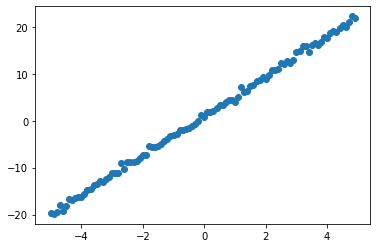

In [3]:
plt.figure()
plt.scatter(x,y)
plt.show()

## Solve the problem using a generalized inverse 

We first build the matrix $\mathbf{G}$ as shown in the lecture.

In [4]:
G = np.column_stack((x.T, np.ones(x.shape).T))

Instead of calculating an inverse, we solve a linear system. Can you think why?

In [5]:
np.linalg.solve(G.T @ G , G.T @ y)

array([4.21476547, 1.11222488])

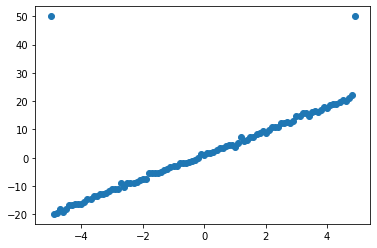

In [6]:
y[0] = 50
y[99] = 50
plt.figure()
plt.scatter(x,y)
plt.show()

In [7]:
np.linalg.solve(G.T @ G , G.T @ y)

array([3.96879864, 2.0778361 ])

## The same problem with scikit-learn
Scikit-learn provides access to a variety of machine learning algorithms through a consistent interface. Here we use the LinearRegression module. We have to modify the shape of the inputs (x), as scikit-learn expects a matrix.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
xf = x.reshape(-1,1)
regr.fit(xf,y)
print (x.shape)
print (xf.shape)
print(regr.coef_)
print(regr.intercept_)

(100,)
(100, 1)
[3.96879864]
2.077836100822866


As an example we can also use a Support Vector Machine (SVM) which we will discuss in the next lecture.

In [9]:
from sklearn import svm
s = svm.LinearSVR()
s.fit(x.reshape(-1,1),y)

LinearSVR()

In [10]:
print(s.coef_)
print(s.intercept_)

[4.23975117]
[1.10387633]


We can add noise information in the estimation of the line.

In [11]:
err = noise * np.ones(x.shape)
W = np.diag(1.0 / err)

In [12]:
np.linalg.solve(G.T @ W @ G , G.T @ W @ y)

array([3.96879864, 2.0778361 ])

In [13]:
err[0] = 10.0
err[99] = 10.0
W = np.diag(1.0 / err)
np.linalg.solve(G.T @ W @ G , G.T @ W @ y)

array([4.20366269, 1.15757984])

## Real data, estimating the Gutenberg-Richter relationship
The file magus2021.txt contains the magnitudes of all earthquakes in the United States between 01/09/21 and 25/10/21 that have been recorded and identified. We can use these to estimate the Gutenberg-Richter relationship.

First we make a histogram and plot the number of events for different magnitudes. 
- What can you see? 
- Describe the graph. 
- What impact will this have on our relationship? 
- Why do we see this effect?

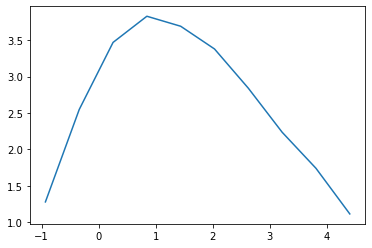

In [14]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


mag = np.genfromtxt('../Data/magus2021.txt',skip_header=1)
count, val = np.histogram(mag)
center = running_mean(val, 2)
logcount = np.log10(count)
plt.figure()
plt.plot(center,logcount)
plt.show()

We can make a simple regression over all data.

In [15]:
cr = center.reshape(-1,1)
regr.fit(cr,logcount)

LinearRegression()

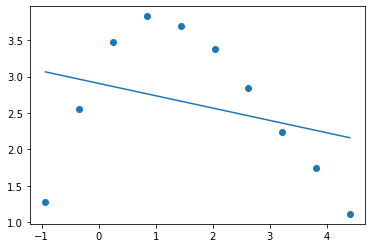

In [16]:
pred = regr.predict(cr)
plt.figure()
plt.scatter(center,logcount)
plt.plot(center,pred)
plt.show()

Try to obtain a better estimate by restricting the magnitudes to a representative range.

*The effect seen above is called **catalog incompleteness**.*

# Adjust code above using pandas

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('../Data/magus2021.txt')
df.shape

(18277, 1)

(1, 10000.0)

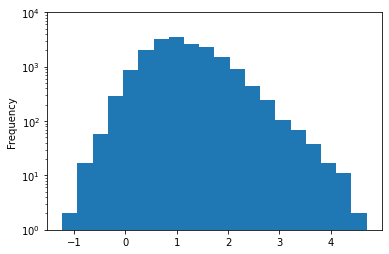

In [49]:
# Use 
# plt.hist(df['mag'], log=True)
# or
df["mag"].plot(kind="hist", logy=True, bins=20)
plt.ylim(1,10e3)

In [31]:
import seaborn as sns  # for nicer graphics

<AxesSubplot:xlabel='mag', ylabel='Count'>

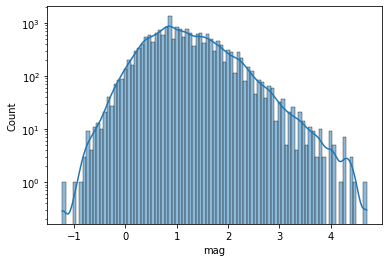

In [61]:
sns.histplot(df['mag'], log_scale=(False, True), kde=True)
#plt.xlim(1,5)